In [76]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
import muon

In [77]:
#!gzip -d GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz

In [78]:
cite = sc.read('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')
cite

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

# Counts the cells by site

In [187]:
cite.obs['Site'].value_counts()

Site
site3    32029
site2    25171
site4    16750
site1    16311
Name: count, dtype: int64

# Extract the site1 cells into a new adata object

In [188]:
site1_true = cite.obs['Site']=='site1'

In [189]:
site1_true

GCATTAGCATAAGCGG-1-s1d1     True
TACAGGTGTTAGAGTA-1-s1d1     True
AGGATCTAGGTCTACT-1-s1d1     True
GTAGAAAGTGACACAG-1-s1d1     True
TCCGAAAAGGATCATA-1-s1d1     True
                           ...  
GAATCACCACGGAAGT-1-s4d9    False
GCTGGGTGTACGGATG-1-s4d9    False
TCGAAGTGTGACAGGT-1-s4d9    False
GCAGGCTGTTGCATAC-1-s4d9    False
ACGTAACAGGTCTACT-1-s4d9    False
Name: Site, Length: 90261, dtype: bool

In [190]:
cite_site1 = cite[site1_true]

In [191]:
cite_site1

View of AnnData object with n_obs × n_vars = 16311 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

### Extract a subset of features (genes) 

In [192]:
rna = cite_site1[:, cite_site1.var['feature_types'] == 'GEX'].copy()
rna

AnnData object with n_obs × n_vars = 16311 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

### Extract a subset of features (proteins) 

In [193]:
adt = cite_site1[:, cite_site1.var['feature_types'] == 'ADT'].copy()
adt

AnnData object with n_obs × n_vars = 16311 × 134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

So there are a total of cells 16,311 with information about of gene expression and protein expression

## RNA

In [194]:
rna.X = rna.layers['counts'].copy()

In [201]:
rna.X

<16311x13953 sparse matrix of type '<class 'numpy.float32'>'
	with 29180124 stored elements in Compressed Sparse Row format>

In [202]:
rna

AnnData object with n_obs × n_vars = 16311 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## ADT

In [203]:
adt.X = adt.layers['counts'].copy()

In [204]:
adt.X

<16311x134 sparse matrix of type '<class 'numpy.float32'>'
	with 1952000 stored elements in Compressed Sparse Row format>

### CITE-seq analysis with totalVI

In [205]:
import tempfile

import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import muon
import scanpy as sc
import scvi
import torch

In [206]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 0


Last run with scvi-tools version: 1.0.2


In [207]:
sc.set_figure_params(figsize=(4, 4))
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [214]:
mdata = md.MuData({"rna": rna_hvg, "protein": adt})
mdata

MuData object with n_obs × n_vars = 16311 × 2134
  2 modalities
    rna:	16311 x 2000
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_rank', 'variances', 'variances_norm'
      uns:	'dataset_id', 'genome', 'organism', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    protein:	16311 x 134
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', '_scvi_batch'
      var:	'feature_types', 'gene_id'
      uns:	'dataset_id', 'genome', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'

In [215]:
mdata.obs["batch"] = rna.obs["batch"].copy()
mdata.obs["cell_type"] = rna.obs["cell_type"].copy()

In [216]:
adata = mdata["rna"].copy()
adata.obsm["protein_expression"] = mdata["protein"].layers["counts"].A.copy()

In [218]:
adata

AnnData object with n_obs × n_vars = 16311 × 2000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'dataset_id', 'genome', 'organism', 'log1p', 'hvg', 'pca', 'neighbors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'protein_expression'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distan

In [217]:
scvi.model.TOTALVI.setup_anndata(
    adata,
    protein_expression_obsm_key="protein_expression",
    layer="counts",
    batch_key="batch",
)

INFO     Generating sequential column names                                                                        


In [219]:
vae = scvi.model.TOTALVI(adata)

INFO     Computing empirical prior initialization for protein background.                                          


In [220]:
vae.train()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|████████████████████████████| 400/400 [29:39<00:00,  4.39s/it, v_num=1, train_loss_step=1.13e+3, train_loss_epoch=1.13e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|████████████████████████████| 400/400 [29:39<00:00,  4.45s/it, v_num=1, train_loss_step=1.13e+3, train_loss_epoch=1.13e+3]


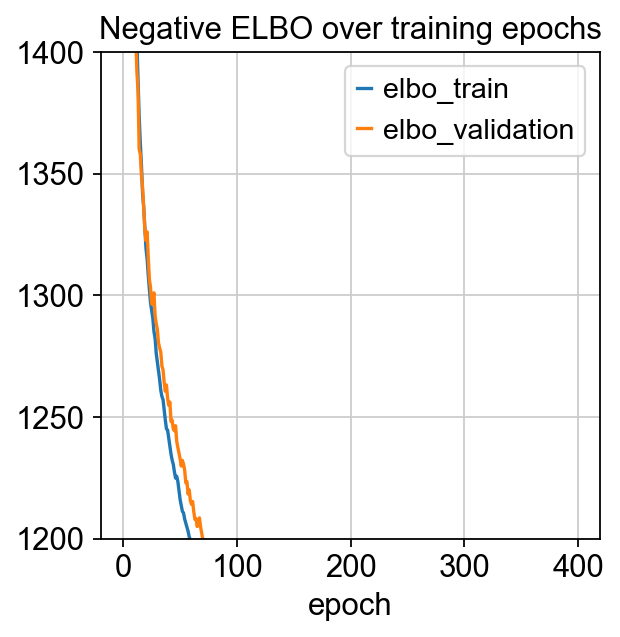

In [222]:
fig, ax = plt.subplots(1, 1)
vae.history["elbo_train"].plot(ax=ax, label="train")
vae.history["elbo_validation"].plot(ax=ax, label="validation")
ax.set(title="Negative ELBO over training epochs", ylim=(1200, 1400))
ax.legend()

In [228]:
mdata.obsm["X_totalVI"] = vae.get_latent_representation()

In [229]:
sc.pp.neighbors(mdata, use_rep="X_totalVI")
sc.tl.umap(mdata)

In [234]:
mdata.obsm["X_umap_totalVI"] = mdata.obsm["X_umap"].copy()

In [235]:
mdata.obs["batch"] = rna.obs["batch"].copy()
mdata.obs["cell_type"] = rna.obs["cell_type"].copy()

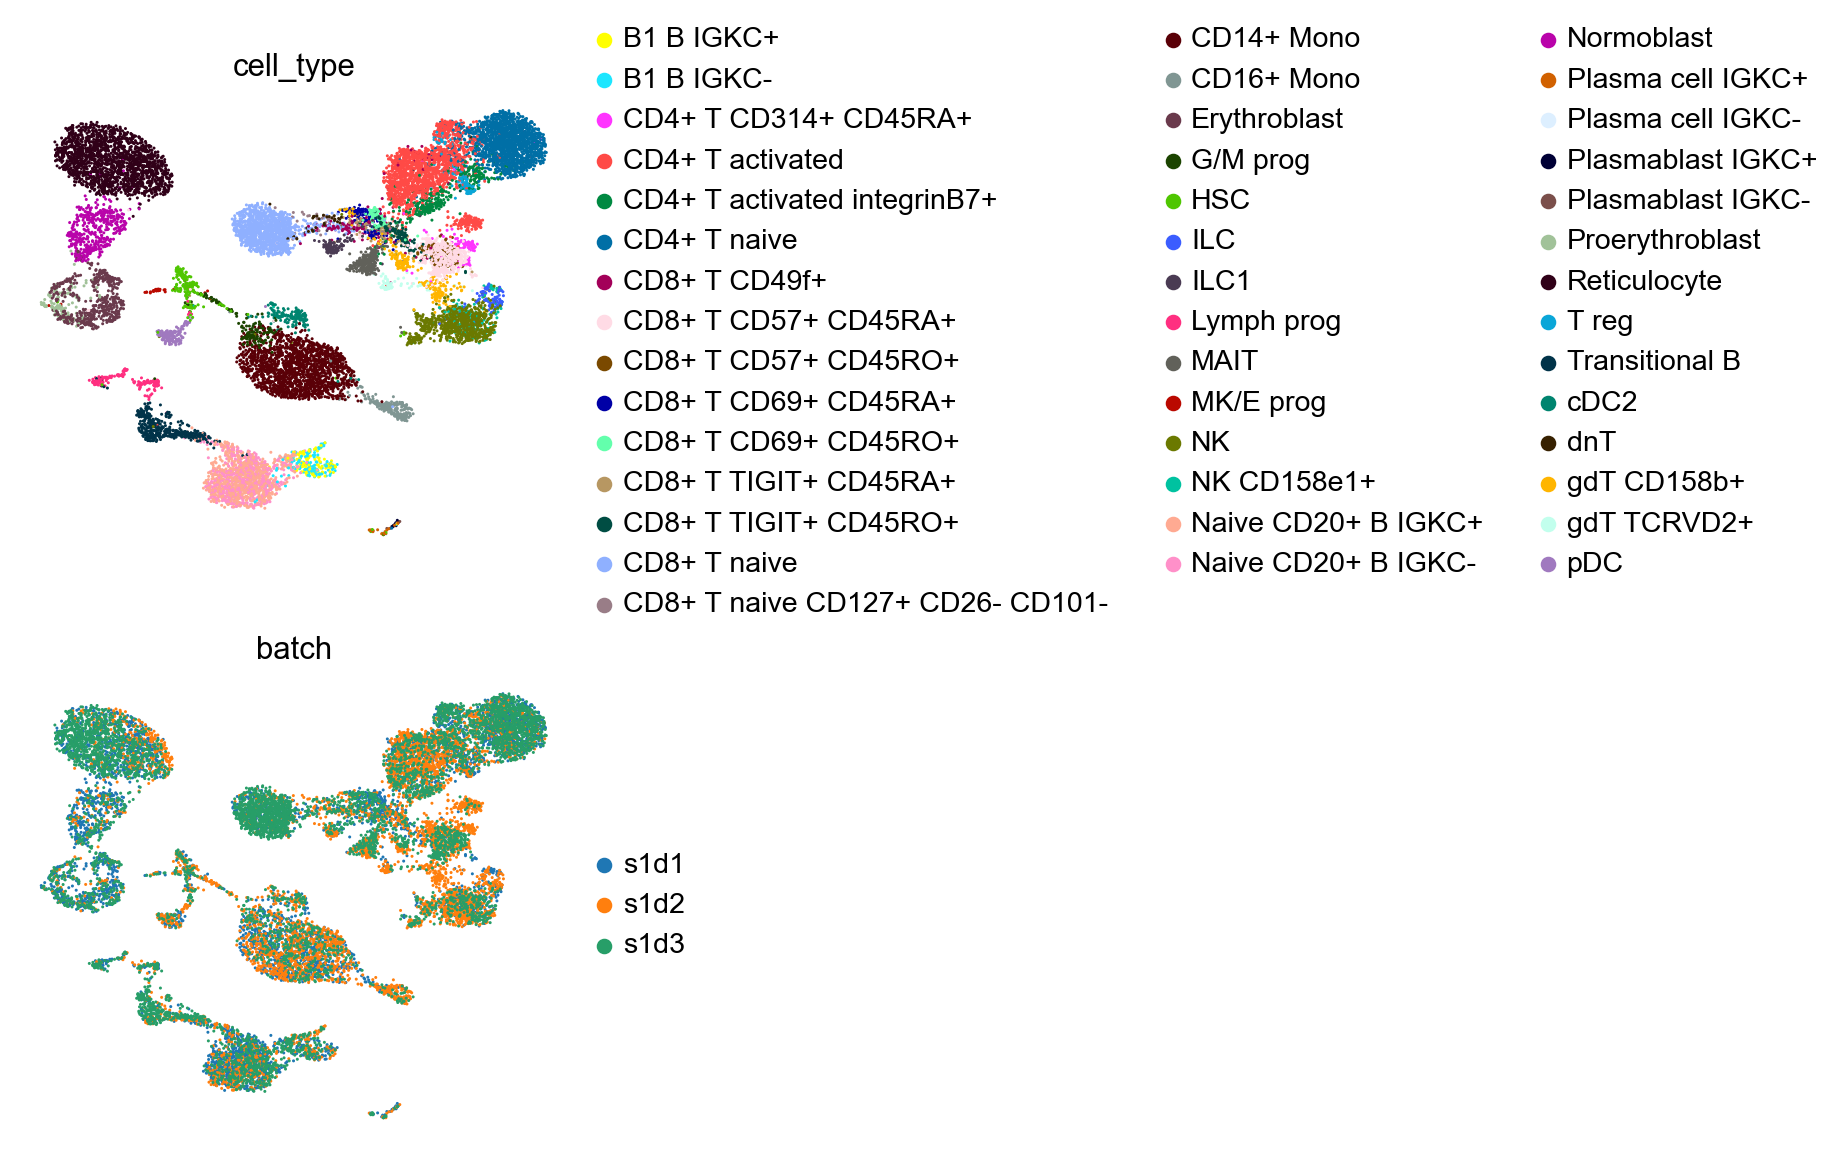

In [236]:
muon.pl.embedding(
    mdata, color=["cell_type", "batch"], ncols=1, basis="umap_totalVI", frameon=False
)

In [237]:
mdata

MuData object with n_obs × n_vars = 16311 × 2134
  obs:	'batch', 'cell_type'
  uns:	'neighbors', 'umap', 'cell_type_colors', 'batch_colors'
  obsm:	'X_totalVI', 'X_umap', 'X_umap_totalVI'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	16311 x 2000
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_rank', 'variances', 'variances_norm'
      uns:	'dataset_id', 'genome', 'organism', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    protein:	16311 x 134
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', '_scvi_batch'
      var:	'feature_types', 'gene_id'
      uns:	'dataset_id', 'genome', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'

In [240]:
# Assuming you have a MuData object named 'mdata'
sc.metrics.gearys_c(mdata, obsm="X_totalVI")

array([0.16847224, 0.04150201, 0.10924496, 0.18561995, 0.14813438,
       0.06332783, 0.24913801, 0.14097149, 0.13032476, 0.1821843 ,
       0.04211925, 0.05452309, 0.11296373, 0.0623562 , 0.05980207,
       0.04901939, 0.12907908, 0.08532119, 0.15063576, 0.14870583])

In [241]:
sc.metrics.morans_i(mdata, obsm="X_totalVI")

array([0.76524793, 0.93871286, 0.86395609, 0.74726735, 0.79305275,
       0.90949213, 0.69952819, 0.81732794, 0.81534366, 0.74960672,
       0.94522323, 0.94559367, 0.84678201, 0.90146417, 0.94430488,
       0.92881817, 0.83240112, 0.88133497, 0.81055273, 0.77535398])

In [242]:
# Assuming you have a MuData object named 'mdata'
sc.metrics.gearys_c(mdata, obsm="X_umap_totalVI")

array([0.00393848, 0.00279778])

In [244]:
# Assuming you have a MuData object named 'mdata'
sc.metrics.morans_i(mdata, obsm="X_umap_totalVI")

array([0.9962996 , 1.00125132])